Figures 2a from my SIAM News publication in 2015: http://www.moresi.info/posts/Computational-Challenges-SIAM-NEWS/

This figure requires the plate motion file and no enormous raster data !

Caption, Figure 2 - _One of the most dramatic departures from plate-like deformation on Earth occurs where the Indian subcontinent is colliding with the Eurasian continent. The map on the left is a satellite image with the flow lines from the plate motion vector field drawn in red. On the right is the same region showing 50 years of earthquake data for events larger than magnitude 4.5, colored by depth and superimposed on the strain rate._



In [1]:
%pylab inline


import cartopy.crs as ccrs
import matplotlib.pyplot as plt

from cartopy.io import PostprocessedRasterSource, LocatedImage
from cartopy.io import srtm
from cartopy.io.srtm import SRTM3Source
import cartopy.feature as cfeature

import scipy.ndimage
import scipy.misc

from scipy.io import netcdf

Populating the interactive namespace from numpy and matplotlib


In [2]:
base_projection     = ccrs.PlateCarree() 
global_extent     = [-180.0, 180.0, -90.0, 90.0]

# etopo1       = gdal.Open("../../Data/Resources/color_etopo1_ice_low.tif")
# etopo_img    = etopo1.ReadAsArray().transpose(1,2,0)
# del(etopo1)

# # Height field only ... 
# etopoH = gdal.Open("../../Data/Resources/ETOPO1_Ice_c_geotiff.tif") 
# etopoH_img = etopoH.ReadAsArray()[::2,::2].astype(numpy.float16)
# del(etopoH)

# colormap = plt.get_cmap('Greys_r')
# norm = matplotlib.colors.Normalize(vmin=-5000, vmax=7500)
# etopoH_img_grey = apply_colormap_to_image(etopoH_img, colormap, norm)

# strainrate_extent=[-180,180,-68,80]
# strainrate = numpy.loadtxt("../../Data/Resources/sec_invariant_strain_0.2.dat")
# strainrate_data = strainrate.reshape(741,1800,3)  # I had to look at the data to work this out !

# globalrelief      = gdal.Open("../../Data/Resources/HYP_50M_SR_W/HYP_50M_SR_W.tif")
# globalrelief_img  = globalrelief.ReadAsArray().transpose(1,2,0)
# del(globalrelief)

# globalbathym      = gdal.Open("../../Data/Resources/OB_50M/OB_50M.tif")
# globalbathym_img  = globalbathym.ReadAsArray().transpose(1,2,0)
# del(globalbathym)

# print ("etopoH_img - ", etopoH_img.shape)
# print ("globalrelief_img - ", globalrelief_img.shape)

# ## If the shapes are different then see the cell below for a way to fix it.

# blended_img = np.empty_like(globalrelief_img)
# blended_img[...,0] = np.where( etopoH_img < 0.0, globalbathym_img[...,0], globalrelief_img[...,0] )
# blended_img[...,1] = np.where( etopoH_img < 0.0, globalbathym_img[...,1], globalrelief_img[...,1] )
# blended_img[...,2] = np.where( etopoH_img < 0.0, globalbathym_img[...,2], globalrelief_img[...,2] )

# # Clean up ... we'll just keep the int8 rgb versions for plotting

# del(globalbathym_img)
# del(globalrelief_img)
# del(etopoH_img)

In [3]:
# Do this if the relief / bathym sizes don't match the etopo data (to make the blended image)
# The datasets we downloaded can be manipulated trivially without the need for this and I have
# commented it all out so you can run all cells without reprocessing the data files. 


"""
import scipy.ndimage
import scipy.misc


etopoH = gdal.Open("Resources/ETOPO1_Ice_g_geotiff.tif")
etopoH_img = etopoH.ReadAsArray()

print 

etopoH_transform = etopoH.GetGeoTransform()
globalrelief_transform = globalrelief.GetGeoTransform()

# Resize to match globalrelief ... this resize is int only ??

globaletopoH = scipy.misc.imresize(etopoH_img, globalrelief_img.shape, mode='F')

## How to turn this array back into the appropriate geotiff

from osgeo import gdal
from osgeo import osr

# data exists in 'ary' with values range 0 - 255
# Uncomment the next line if ary[0][0] is upper-left corner
#ary = numpy.flipup(ary)

Ny, Nx = globaletopoH.shape
driver = gdal.GetDriverByName("GTiff")
# Final argument is optional but will produce much smaller output file
ds = driver.Create('output.tif', Nx, Ny, 1, gdal.GDT_Float64, ['COMPRESS=LZW'])

# this assumes the projection is Geographic lat/lon WGS 84
srs = osr.SpatialReference()
srs.ImportFromEPSG(4326)
ds.SetProjection(srs.ExportToWkt())

ds.SetGeoTransform( globalrelief_transform  ) # define GeoTransform tuple
ds.GetRasterBand(1).WriteArray(globaletopoH)
ds = None
"""

pass


In [4]:
base_projection = ccrs.PlateCarree()
global_extent = [ -180, 180, -90, 90 ]
himalaya_extent = [65, 110, 5, 45 ]


coastline = cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                           edgecolor=(0.0,0.0,0.0),
                           facecolor="none")

rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '50m',
                                        edgecolor='Blue', facecolor="none")

lakes = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                        edgecolor="blue", facecolor="blue")

ocean = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                           edgecolor="green",
                           facecolor="blue")

graticules_5 = cfeature.NaturalEarthFeature('physical', 'graticules_5', '10m',
                           edgecolor="black", facecolor=None)


In [5]:
# from obspy.core import event
# from obspy.clients.fdsn import Client
# from obspy import UTCDateTime

# client = Client("IRIS")


# starttime = UTCDateTime("1965-01-01")
# endtime   = UTCDateTime("2016-01-01")
# cat = client.get_events(starttime=starttime, endtime=endtime,
#                         minlongitude=himalaya_extent[0],
#                         maxlongitude=himalaya_extent[1],
#                         minlatitude=himalaya_extent[2],
#                         maxlatitude=himalaya_extent[3],
#                         minmagnitude=4.5, catalog="ISC")

# print (cat.count(), " events in catalogue")

In [6]:
# # Unpack the opspy data into a plottable array

# event_count = cat.count()

# eq_origins = np.zeros((event_count, 5))

# for ev, event in enumerate(cat.events):
#     eq_origins[ev,0] = dict(event.origins[0])['longitude']
#     eq_origins[ev,1] = dict(event.origins[0])['latitude']
#     eq_origins[ev,2] = dict(event.origins[0])['depth']
#     eq_origins[ev,3] = dict(event.magnitudes[0])['mag']
#     eq_origins[ev,4] = (dict(event.origins[0])['time']).date.year



In [7]:

rootgrp = netcdf.netcdf_file(filename="../../Data/Reference/velocity_EU.nc", version=2)

ve = rootgrp.variables["ve"]
vn = rootgrp.variables["vn"]

lonv = rootgrp.variables["lon"]
latv = rootgrp.variables["lat"]

lons = lonv[::1]
lats = latv[::1]
llX, llY = np.meshgrid(lons,lats)

#llX = llX.reshape(-1)
#llY = llY.reshape(-1)

Veast = (np.array(ve[::1,::1]).T)
Vnorth = (np.array(vn[::1,::1]).T)

Vorientation = np.arctan2(Vnorth,Veast)
Vspeed = np.sqrt(Veast**2 + Vnorth**2)


In [8]:
# Map / Image Tile machinery

import cartopy.io.img_tiles as cimgt

mapbox_satellite = cimgt.MapboxTiles(map_id='satellite', 
                                     access_token='pk.eyJ1IjoibG91aXNtb3Jlc2kiLCJhIjoiY2pzeG1mZzFqMG5sZDQ0czF5YzY1NmZ4cSJ9.lpsUzmLasydBlS0IOqe5JA')

mapbox_streets = cimgt.MapboxTiles(map_id='streets', 
                                     access_token='pk.eyJ1IjoibG91aXNtb3Jlc2kiLCJhIjoiY2pzeG1mZzFqMG5sZDQ0czF5YzY1NmZ4cSJ9.lpsUzmLasydBlS0IOqe5JA')

## Continental US terrain images
stamen_Terrain = cimgt.Stamen('terrain-background')
stamen_TerrainPlus = cimgt.Stamen('terrain')
stamen_Artist = cimgt.Stamen('watercolor')

## Google maps image tiles ()
google_maps_street = cimgt.GoogleTiles(style="street") 
google_maps_satellite = cimgt.GoogleTiles(style="satellite") 
google_maps_terrain = cimgt.GoogleTiles(style="terrain") 



NameError: name 'LONGITUDE_FORMATTER' is not defined

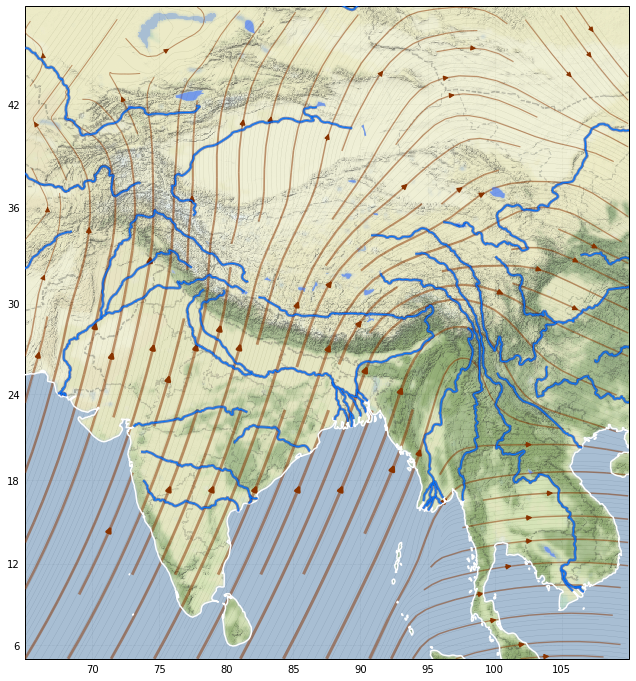

In [9]:
## Figure 2a is a land / ocean image with coastlines and rivers over the top.
## The red / grey lines are streamlines of the plate motion data which show trajectories in 
## a way which is not as intrusive as a bunch of arrows.

from matplotlib.transforms import offset_copy

import cartopy.crs as ccrs

# import gdal
# from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker


# Choose one of the map tile services above. I used map_tiles = mapbox_satellite for the published 
# plot, but this does require registration here: https://www.mapbox.com/help/create-api-access-token/
# The map_quest image does not seem to be registered correctly with the coastline so I am probably doing something
# wrong. But the mapbox one looks perfectly fine !

map_tiles = stamen_Terrain

fig = plt.figure(figsize=(12, 12), facecolor="none")
# ax = plt.axes(projection=ccrs.PlateCarree(), extent=himalaya_extent)

# Create a GeoAxes in the tile's projection.
ax = plt.axes(projection=map_tiles.crs)

    # Limit the extent of the map to a small longitude/latitude range.
ax.set_extent(himalaya_extent)

    # Add the MapQuest data at zoom level 8.
    
ax.streamplot(lons, lats, Veast, Vnorth, linewidth=0.25, color='black', 
              cmap=cm.gray_r, density=5.0, transform=ccrs.PlateCarree(), zorder=0, arrowstyle='-')

ax.add_image(map_tiles, 5, alpha=0.85, zorder=2)

streamlines = ax.streamplot(lons, lats, Veast, Vnorth, linewidth=1+Vspeed*0.05, color='#883300', cmap=cm.Reds_r,
              transform=ccrs.PlateCarree(), zorder=4)

streamlines.lines.set_alpha(0.5)


ax.add_feature(coastline, linewidth=1.5,  edgecolor="White", zorder=10)
ax.add_feature(rivers,    linewidth=1.0,    edgecolor="#0077FF", zorder=13)
ax.add_feature(rivers,    linewidth=3.0,    edgecolor="#002299",    zorder=12, alpha=0.5)
ax.add_feature(lakes,     linewidth=0,    edgecolor="Blue", facecolor="#4477FF", zorder=11, alpha=0.5)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='#222222', alpha=1.0, linestyle=':' )

gl.xlabels_top = False
gl.ylabels_right = False
# gl.xlines = False
# gl.xlines = False


gl.xlocator = mticker.FixedLocator(np.arange(65,110,5))
glyxlocator = mticker.FixedLocator(np.arange(5,45,5))

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 18, 'color': 'black'}
gl.ylabel_style = {'size': 18, 'color': 'black'}


In [ ]:
fig.savefig("HimalayaRivers.png", dpi=300)

In [ ]:
## Figure 3a is the regional setting which is used as a base to draw an
## interpretation of some 3D models. 

himalaya_region_extent = [ 55 , 135, -20, 45 ]

map_tiles = mapbox_satellite

fig = plt.figure(figsize=(12, 12), facecolor="none")
# ax = plt.axes(projection=ccrs.PlateCarree(), extent=himalaya_extent)

# Create a GeoAxes in the tile's projection.
ax = plt.axes(projection=map_tiles.crs)

# Limit the extent of the map

ax.set_extent(himalaya_region_extent)

ax.add_image(map_tiles, 5, alpha=0.45, zorder=2)

ax.add_feature(coastline, linewidth=1.5,  edgecolor="Black", zorder=1)


